<a href="https://colab.research.google.com/github/Fr0stb1t3/DataScience-Assignment/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part A
#Heirarical Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = dataset.iloc[:,[3,4]].values

In [5]:
import scipy.cluster.hierarchy as sch

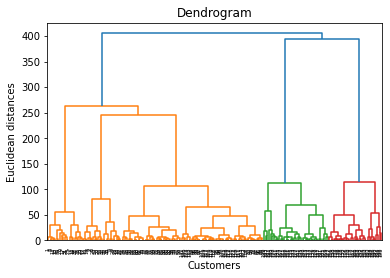

In [6]:
dendrogram = sch.dendrogram(sch.linkage(X,method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Fitting hierarchical clustering to the Mall_Customes dataset
# There are two algorithms for hierarchical clustering: Agglomerative Hierarchical Clustering and 
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our 
# algorithm class

In [7]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage ='ward')


In [8]:
y_hc = hc.fit_predict(X)

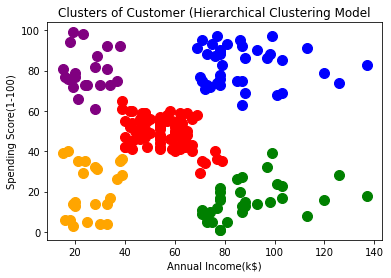

In [9]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='green', label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='red', label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='blue', label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='purple', label='Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='orange', label='Cluster 5')
plt.title('Clusters of Customer (Hierarchical Clustering Model')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

From this cluster we can infer that:
<br> Green: High Income vs Low Spending => careful
<br> Red: Normal Income vs Normal Spending => Standard
<br> Blue: High Income vs High Spending => Target
<br> Purple: Low Income vs High Spending => careless
<br> Orange: Low Income vs Low Spending => Sensible

#Text analysis using topic modelling

In [12]:
import pandas as pd
import os

In [13]:
papers  = pd.read_csv('papers.csv')
#Uncomment the following lines if you are going to upload the file to Colab 
#from google.colab import files
#f = files.upload()
#papers  = pd.read_csv('papers.csv')

In [14]:
#papers = pd.read_csv('papers.csv')
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [15]:
#Cleaning
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
1833,2004,Hierarchical Eigensolver for Transition Matric...,Abstract Missing,Hierarchical Eigensolver for Transition Matric...
163,1995,Strong Unimodality and Exact Learning of Const...,Abstract Missing,"-\n\n32\n\n,\n\n\n\t \n  ..."
1653,2003,Nonlinear Filtering of Electron Micrographs by...,Abstract Missing,Nonlinear Filtering of Electron\nMicrographs b...
448,1997,New Approximations of Differential Entropy for...,Abstract Missing,New Approximations of Differential\nEntropy fo...
4166,2012,Identification of Recurrent Patterns in the Ac...,Identifying patterns from the neuroimaging rec...,Identification of Recurrent Patterns in the Ac...


In [16]:
import re

#remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]','',x))


In [17]:
#convert to lower case and print first rows
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
papers['paper_text_processed'].head()

1833    hierarchical eigensolver for transition matric...
163     -\n\n32\n\n\n\n\n\t 
 \n
 
...
1653    nonlinear filtering of electron\nmicrographs b...
448     new approximations of differential\nentropy fo...
4166    identification of recurrent patterns in the ac...
Name: paper_text_processed, dtype: object

In [18]:
#Exploratory Analysis:
# To verify the preprocessing we use a word cloud 
from wordcloud import WordCloud
long_string = ','.join(list(papers['paper_text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

ModuleNotFoundError: No module named 'wordcloud'

In [30]:
#Prepare text for LDA
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\RITIK
[nltk_data]     SETH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [32]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))


In [33]:
# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['hierarchical', 'eigensolver', 'transition', 'matrices', 'spectral', 'methods', 'chakra', 'chennubhotla', 'allan', 'jepson', 'department', 'computational', 'biology', 'university', 'pittsburgh', 'department', 'computer', 'science', 'university', 'toronto', 'abstract', 'show', 'build', 'hierarchical', 'reduced', 'rank', 'representation', 'large', 'stochastic', 'matrices']


In [34]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 4), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 3), (8, 2), (9, 2), (10, 1), (11, 2), (12, 1), (13, 1), (14, 2), (15, 1), (16, 3), (17, 21), (18, 1), (19, 2), (20, 3), (21, 5), (22, 14), (23, 10), (24, 3), (25, 1), (26, 1), (27, 1), (28, 1), (29, 4)]


In [35]:
#LDA Model Training
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"model" + 0.006*"learning" + 0.006*"data" + 0.004*"function" + '
  '0.004*"time" + 0.004*"set" + 0.003*"models" + 0.003*"algorithm" + '
  '0.003*"distribution" + 0.003*"one"'),
 (1,
  '0.006*"learning" + 0.005*"model" + 0.005*"algorithm" + 0.005*"set" + '
  '0.004*"data" + 0.003*"number" + 0.003*"neural" + 0.003*"network" + '
  '0.003*"training" + 0.003*"time"'),
 (2,
  '0.006*"model" + 0.005*"figure" + 0.005*"data" + 0.005*"learning" + '
  '0.004*"set" + 0.004*"using" + 0.003*"graph" + 0.003*"function" + '
  '0.003*"one" + 0.003*"algorithm"'),
 (3,
  '0.007*"model" + 0.005*"data" + 0.004*"function" + 0.004*"learning" + '
  '0.004*"set" + 0.004*"algorithm" + 0.004*"one" + 0.004*"matrix" + 0.003*"xi" '
  '+ 0.003*"results"'),
 (4,
  '0.007*"model" + 0.007*"learning" + 0.005*"data" + 0.004*"set" + '
  '0.004*"algorithm" + 0.004*"one" + 0.004*"figure" + 0.004*"time" + '
  '0.004*"using" + 0.004*"number"'),
 (5,
  '0.007*"learning" + 0.007*"model" + 0.005*"set" + 0.005*"algor